## PS8 Yuming Liu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform as sp_uniform
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('biden.csv')

### Problem 1(a)

In [3]:
X = ['female', 'educ', 'age', 'dem', 'rep']
y = 'biden'
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], train_size = 0.7, test_size = 0.3, random_state=25)

In [4]:
btree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)
tree_train = btree.fit(X_train, y_train)

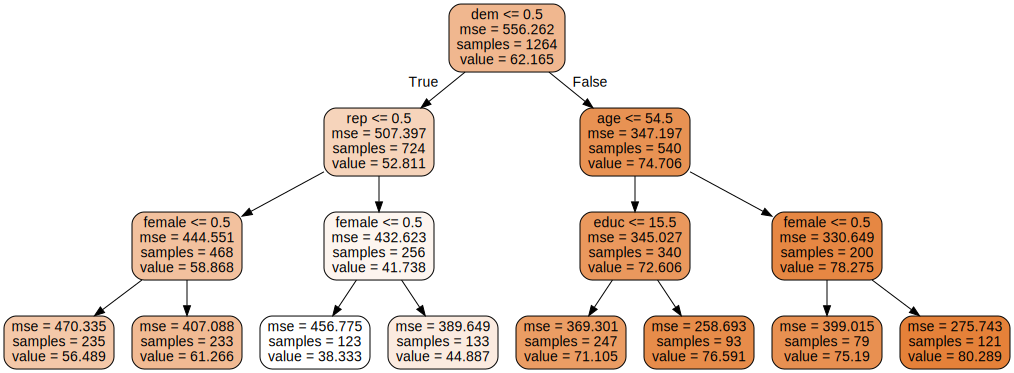

In [5]:
tree_viz = export_graphviz(
    btree,
    out_file = None,
    feature_names = X,
    class_names = df.biden,
    rounded = True,
    filled = True,
)

graph = graphviz.Source(tree_viz)
graph.render('tree_viz1')
graph

The tree splits the predictors into eight final nodes. The first spliting attribute is dem. The left-hand side consists of observations who are not affiliated with Democratic Party, and the right-hand side are observations who are affiliated with Democratic Party.

In [5]:
y_pred = btree.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print('MSE = ', MSE)

MSE =  396.1937146321307


### Problem 1(b)

In [6]:
param_dist1 = {'max_depth': [3, 10],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20)}

In [7]:
random_search1 = \
    RandomizedSearchCV(btree, param_distributions=param_dist1,
                       n_iter=100, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

In [8]:
random_search1.fit(X_train, y_train)

print('Optimal tuning parameter values = ', random_search1.best_params_)
print('MSE = ', abs(random_search1.best_score_))

Optimal tuning parameter values =  {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 9}
MSE =  404.70994082761746


### Problem 1(c)

In [10]:
param_dist2 = {'n_estimators': [10, 200],'max_depth': [3, 10],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 5)}

btree2 = RandomForestRegressor()

In [11]:
random_search2 = \
    RandomizedSearchCV(btree2, param_distributions=param_dist2,
                       n_iter=100, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

In [12]:
random_search2.fit(X_train, y_train)

print('Optimal tuning parameter values = ', random_search2.best_params_)
print('MSE = ', abs(random_search2.best_score_))

Optimal tuning parameter values =  {'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 19, 'min_samples_split': 4, 'n_estimators': 200}
MSE =  398.0557102517035


### Problem 2(a)

In [13]:
df2 = pd.read_csv('Auto.csv', na_values='?')
df2.dropna(inplace = True)

In [14]:
df2.columns=['mpg', 'cyl', 'dspl', 'hpwr', 'wgt', 'accl', 'yr', 'orgn','name']
df2['mpg_high'] = (df2['mpg']>=df2['mpg'].median()).astype('int')
df2_orgn = pd.get_dummies(df2.orgn, prefix='orgn').iloc[:, :-1]
df2 = pd.concat([df2, df2_orgn], axis=1)
df2 = df2.drop(columns = ['name'])

In [15]:
kf_log = KFold(n_splits=4, shuffle=True, random_state=25)
X = df2[['cyl', 'dspl', 'hpwr', 'wgt', 'accl', 'yr', 'orgn_1', 'orgn_2']].values
y = df2['mpg_high'].values
kf_log.get_n_splits(X)
err_1 = np.zeros(4)
err_0 = np.zeros(4)
MSE_vec_kf = np.zeros(4)

In [16]:
k = 0

for train_index, test_index in kf_log.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    LogReg = LogisticRegression(max_iter = 300)
    LogReg.fit(X_train, y_train)
    y_pred = LogReg.predict(X_test)
    err_1_pred = ((y_test!=y_pred)&(y_test == 1)).sum()/(y_test == 1).sum()
    err_0_pred = ((y_test!=y_pred)&(y_test == 0)).sum()/(y_test == 0).sum()
    err_1[k] = err_1_pred
    err_0[k] = err_0_pred
    MSE_vec_kf[k] = (y_test != y_pred).mean()
    print('MSE for test set', k, '=', MSE_vec_kf[k])
    print('Error rate of mpg_high = 1 for test set', k, '=', err_1_pred)
    print('Error rate of mpg_high = 0 for test set', k, '=', err_0_pred)
    k += 1

MSE for test set 0 = 0.14285714285714285
Error rate of mpg_high = 1 for test set 0 = 0.12727272727272726
Error rate of mpg_high = 0 for test set 0 = 0.16279069767441862
MSE for test set 1 = 0.09183673469387756
Error rate of mpg_high = 1 for test set 1 = 0.07317073170731707
Error rate of mpg_high = 0 for test set 1 = 0.10526315789473684
MSE for test set 2 = 0.07142857142857142
Error rate of mpg_high = 1 for test set 2 = 0.043478260869565216
Error rate of mpg_high = 0 for test set 2 = 0.09615384615384616
MSE for test set 3 = 0.08163265306122448
Error rate of mpg_high = 1 for test set 3 = 0.05555555555555555
Error rate of mpg_high = 0 for test set 3 = 0.11363636363636363


In [17]:
MSE_kf = MSE_vec_kf.mean()
err1 = err_1.mean()
err0 = err_0.mean()
print('The estimate MSE loocv of the test =', MSE_kf)
print('Error rate of mpg_high = 1 is', err1)
print('Error rate of mpg_high = 0 is', err0)

The estimate MSE loocv of the test = 0.09693877551020408
Error rate of mpg_high = 1 is 0.07486931885129128
Error rate of mpg_high = 0 is 0.11946101633984131


### Problem 2(b)

In [18]:
param_dist3 = {'n_estimators': [10, 200],
               'max_depth': [3, 8],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 8)}

In [19]:
random_auto = \
    RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist3,
                       n_iter=100, n_jobs=-1, cv=4, random_state=25,
                       scoring='neg_mean_squared_error')

In [20]:
random_auto.fit(X, y)

print('Optimal tuning parameter values = ', random_auto.best_params_)
print('MSE = ', abs(random_auto.best_score_))

Optimal tuning parameter values =  {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 10}
MSE =  0.08418367346938775


### Problem 2(c)

In [21]:
param_dist4 = {'C': sp_uniform(loc=0.2, scale=4.0),
               'gamma': ['scale', 'auto'],
               'shrinking': [True, False]}

In [22]:
random_auto2 = \
    RandomizedSearchCV(SVC(kernel='rbf'), param_distributions=param_dist4,
                       n_iter=100, n_jobs=-1, cv=4, random_state=25,
                       scoring='neg_mean_squared_error')

In [23]:
random_auto2.fit(X, y)

print('Optimal tuning parameter values = ', random_auto2.best_params_)
print('MSE = ', abs(random_auto2.best_score_))

Optimal tuning parameter values =  {'C': 1.8094629152568114, 'gamma': 'scale', 'shrinking': False}
MSE =  0.11989795918367346


### Problem 2(d)

The best predictor for mph_high is the Random Forest since it has the lowest MSE.